<a href="https://colab.research.google.com/github/Akveni/FreeCodeCamp/blob/master/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd 
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
# Set random seed to give same result to keep the script consistent
np.random.seed(500)

In [ ]:
#As data may contain many special characters we use encoding = 'latin -1' to avoid unicode decode error
data = pd.read_csv(r'corpus.csv', encoding='latin-1')

In [ ]:
data.shape

(10000, 2)

In [ ]:
# Data preprocessing
#Tokenization
# Remove dataspaces if any
data['text'].dropna(inplace = True)
data['text']

0        Stuning even for the non-gamer: This sound tr...
1        The best soundtrack ever to anything.: I'm re...
2        Amazing!: This soundtrack is my favorite musi...
3        Excellent Soundtrack: I truly like this sound...
4        Remember, Pull Your Jaw Off The Floor After H...
                              ...                        
9995     A revelation of life in small town America in...
9996     Great biography of a very interesting journal...
9997     Interesting Subject; Poor Presentation: You'd...
9998     Don't buy: The box looked used and it is obvi...
9999     Beautiful Pen and Fast Delivery.: The pen was...
Name: text, Length: 10000, dtype: object

In [ ]:
#Change all the text to lower case as python is case-sensitive
data['text'] = [entry.lower() for entry in data['text']]
data['text']

0        stuning even for the non-gamer: this sound tr...
1        the best soundtrack ever to anything.: i'm re...
2        amazing!: this soundtrack is my favorite musi...
3        excellent soundtrack: i truly like this sound...
4        remember, pull your jaw off the floor after h...
                              ...                        
9995     a revelation of life in small town america in...
9996     great biography of a very interesting journal...
9997     interesting subject; poor presentation: you'd...
9998     don't buy: the box looked used and it is obvi...
9999     beautiful pen and fast delivery.: the pen was...
Name: text, Length: 10000, dtype: object

In [ ]:
!pip3 install nltk

In [ ]:
# Tokenization
# In this we will break the sentence into set of words
import nltk
nltk.download('punkt')
tokens = [word_tokenize(entry) for entry in data]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<FreqDist with 2 samples and 2 outcomes>
2 most common :-  [('text', 1), ('label', 1)]


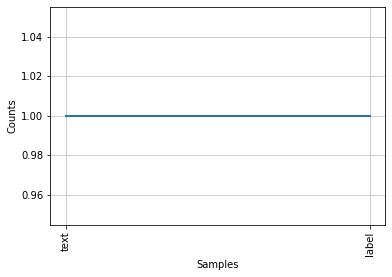

In [ ]:
#Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(data)
print(fdist)
print("2 most common :- ",fdist.most_common(2))
#<FreqDist with 25 samples and 30 outcomes>
#2 most common :-  [('is', 3), (',', 2)]
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
#from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
nltk.download('stopwords')
#from nltk.tokenize import word_tokenize
tokens_with_sw = [word for word in tokens if word in stopwords.words()]
tokens_without_sw = [word for word in tokens if not word in stopwords.words()]

print(tokens_without_sw)
print(tokens_with_sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['text'], ['label']]
[]


In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn  #Import wordnet from the NLTK

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [ ]:
for index,entry in enumerate(data['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    
data.loc[index,'text_final'] = str(Final_words)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        10000 non-null  object
 1   label       10000 non-null  object
 2   text_final  1 non-null      object
dtypes: object(3)
memory usage: 234.5+ KB


In [ ]:
data['text']
X_enc = data.apply(LabelEncoder().fit_transform) 
mergedata = mergedata.drop(X_cat.columns, axis=1)
# #END LABEL ENCODING BLOCK


TypeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['text_final'],data['label'],test_size=0.3)

In [ ]:
Encoder = LabelEncoder()
x_train = Encoder.fit_transform(x_train)
x_test = Encoder.fit_transform(x_test)
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

TypeError: ignored

In [ ]:
tfidf_vect = TfidfVectorizer(max_features=5000)
tfidf_vect.fit(data['text_final'])
x_train_tfidf = tfidf_vect.transform(x_train)
x_test_tfidf = tfidf_vect.transform(x_text)

AttributeError: ignored

In [ ]:
print(tfidf_vect.vocabulary_)

In [ ]:
print(x_train_tfidf)

In [ ]:
# fit the training dataset on the NB classifier
naive = naive_bayes.MultinomialNB()
naive.fit(x_train_tfidf,y_train)
# predict the labels on validation dataset
predictions_NB = naive.predict(x_test_tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y+test)*100)

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train_tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(x_test_tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)